## UNIVERSIDAD AUTONOMA DE AGUASCALIENTES
### Departamento: Centro de Ciencias Básicas 
### Jose Luis Sandoval Perez
### Curso: Metaheurística I
### Maestro: Francisco Javier Luna Rosas
### 7mo Semestre

# PRACTICA No 5: PSO
### La optimización por enjambre de partícula (PSO) es un algoritmo de optimización basado a simulación de la conducta social de organismo, como badadas de aves o bancos de peces

### En esta práctica implementamos PSO para buscar el óptimo global de una función en 2D (f(x) = x^2 + y^2).

## Paso 1: Importar las librerías necesarias

Iteracion 1 / 100, Mejor valor global: 4.229538503997319
Iteracion 2 / 100, Mejor valor global: 0.6158065732963532
Iteracion 3 / 100, Mejor valor global: 0.6158065732963532
Iteracion 4 / 100, Mejor valor global: 0.2810343539940522
Iteracion 5 / 100, Mejor valor global: 0.2810343539940522
Iteracion 6 / 100, Mejor valor global: 0.01755520434522279
Iteracion 7 / 100, Mejor valor global: 0.01755520434522279
Iteracion 8 / 100, Mejor valor global: 0.01755520434522279
Iteracion 9 / 100, Mejor valor global: 0.005906020269824004
Iteracion 10 / 100, Mejor valor global: 0.005906020269824004
Iteracion 11 / 100, Mejor valor global: 0.003371487498696513
Iteracion 12 / 100, Mejor valor global: 0.003371487498696513
Iteracion 13 / 100, Mejor valor global: 0.003371487498696513
Iteracion 14 / 100, Mejor valor global: 0.00152316216801931
Iteracion 15 / 100, Mejor valor global: 1.929117737515751e-07
Iteracion 16 / 100, Mejor valor global: 1.929117737515751e-07
Iteracion 17 / 100, Mejor valor global: 1.9291

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


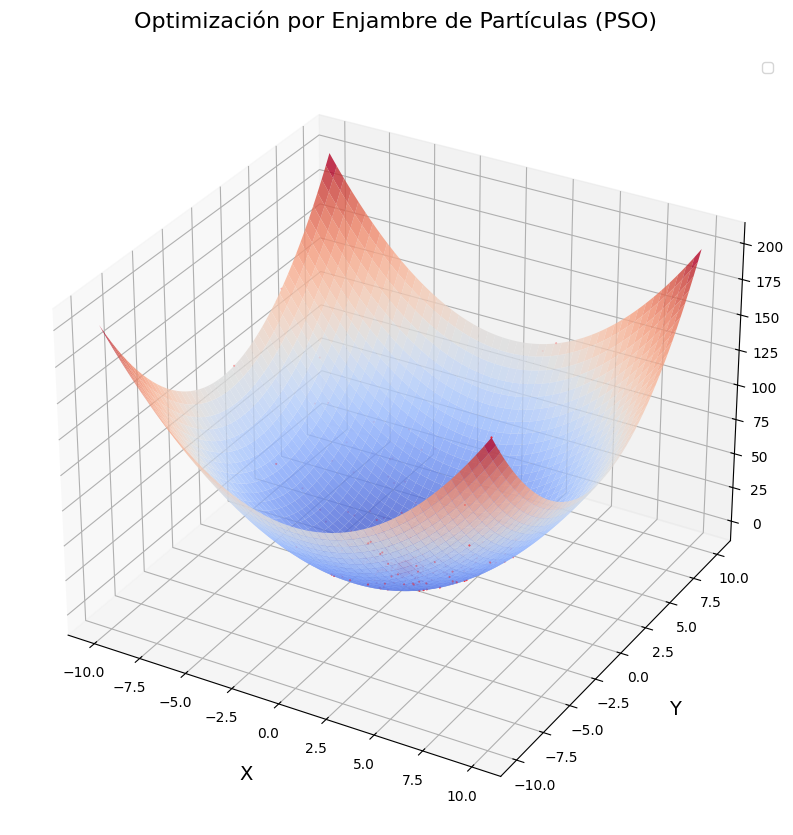

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la función objetivo
def objective_f(x, y):
	return x**2 + y**2

# Parámetros del PSO
num_particles = 30
num_dimensions = 2
num_iterations = 100
w = 0.5  # Factor de inercia que controla la velocidad
c1 = 1.5  # Constante cognitiva
c2 = 2.0  # Constante social

# Límites de la búsqueda
bounds = (-10, 10)

# Inicializar las partículas y velocidades
particles = np.random.uniform(bounds[0], bounds[1], (num_particles, num_dimensions))
velocities = np.random.uniform(-1, 1, (num_particles, num_dimensions))

# Inicializar las mejores posiciones individuales y globales
pbest_position = particles.copy()
pbest_value = np.array([objective_f(x[0], x[1]) for x in particles])
gbest_position = pbest_position[np.argmin(pbest_value)]
gbest_value = np.min(pbest_value)

# Lista para almacenar la trayectoria de las partículas
history_position = []

# Implementar el ciclo principal del PSO
for t in range(num_iterations):
	for i in range(num_particles):
		# Evaluar la función objetivo
		fitness = objective_f(particles[i][0], particles[i][1])

		# Actualizar la mejor posición individual
		if fitness < pbest_value[i]:
			pbest_value[i] = fitness
			pbest_position[i] = particles[i].copy()

		# Actualizar la mejor posición global
		if fitness < gbest_value:
			gbest_value = fitness
			gbest_position = particles[i].copy()

	# Actualizar velocidades y posiciones
	for i in range(num_particles):
		r1 = random.random()
		r2 = random.random()

		velocities[i] = (w * velocities[i]
						 + c1 * r1 * (pbest_position[i] - particles[i])
						 + c2 * r2 * (gbest_position - particles[i]))

		particles[i] = particles[i] + velocities[i]

		# Respetar los límites de la búsqueda
		particles[i] = np.clip(particles[i], bounds[0], bounds[1])

	history_position.append(particles.copy())  # Para graficar
	print(f"Iteracion {t+1} / {num_iterations}, Mejor valor global: {gbest_value}")

print(f"Mejor posicion encontrada: {gbest_position}, con valor: {gbest_value}")

# Graficar la función objetivo en 3D
# Graficar la función objetivo en 3D
x_values = np.linspace(-10, 10, 400)
y_values = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_values, y_values)
Z = objective_f(X, Y)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Superficie de la función
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.8, edgecolor='none')

# Trayectoria de las partículas
for positions in history_position:
    ax.scatter(positions[:, 0], positions[:, 1], objective_f(positions[:, 0], positions[:, 1]), color='red', s=0.2)


# Personalización de la gráfica
ax.set_xlabel('X', labelpad=15, fontsize=14)
ax.set_ylabel('Y', labelpad=15, fontsize=14)
ax.set_zlabel('f(X, Y)', labelpad=15, fontsize=14)
ax.set_title('Optimización por Enjambre de Partículas (PSO)', fontsize=16, pad=20)
ax.legend()

# Mejor solución encontrada
ax.scatter([gbest_position[0]], [gbest_position[1]], [objective_f(gbest_position[0], gbest_position[1])], color='red', s=100, label='Mejor solucion', marker='o')

# Mostrar gráfica
plt.show()